111261022 林品妤

## Question 1


In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
f = np.load('/Users/pinyu/Documents/HW for 神經科學/hw2/hw02-data.npz')

In [8]:
spikes =  f['spikes']
frames = f['frames']
delta_time = f['delta_t'][()]

In [38]:
print(spikes)

[0.09696168 0.10307687 0.11433396 0.12579946 0.12887239 0.18359716
 0.24427284 0.24608383 0.25180093 0.26095241 0.27039468 0.27416038
 0.29035533 0.29484004 0.30198304 0.3094274  0.32012454 0.32141874
 0.32584951 0.32826612 0.3315468  0.33653385 0.3495196  0.35885703
 0.36174743 0.36202729 0.37417165 0.38494309 0.39268181 0.39800259
 0.42742255 0.43266981 0.43342266 0.45225739 0.47526365 0.4756051
 0.47943679 0.48882653 0.4903476  0.4939631  0.49595051 0.50461547
 0.50551208 0.52315591 0.52462541 0.52700264 0.5273287  0.52783478
 0.53446976 0.54597137 0.55050911 0.55341238 0.55342202 0.56167318
 0.57149578 0.58515704 0.64740062 0.69250725 0.69724291 0.8508171
 0.92582138 0.97630528 0.98912996 1.03427208 1.07218109 1.07253657
 1.07930248 1.09779706 1.15691549 1.16866196 1.17629045 1.18556874
 1.18640821 1.19252939 1.20106707 1.2183435  1.22145674 1.22958975
 1.2298246  1.2347432  1.23603117 1.25757058 1.26934397 1.30431659
 1.32004048 1.32946303 1.34741264 1.35845559 1.38425287 1.387189

In [22]:
print(list(f))
print('size of the spikes:', spikes.size)
print('Maximum of spikes:', spikes.max())
print('Minimum of spikes:', spikes.min())
print('size of the frame:', frames.size)
print('Maximum of frames:', frames.max())
print('Minimum of frames:', frames.min())
print('delta time:', f['delta_t'])

['spikes', 'frames', 'delta_t']
size of the spikes: 327
Maximum of spikes: 8.956914912974351
Minimum of spikes: 0.09696167830561589
size of the frame: 81920
delta time: 0.0001220703125
Maximum of frames: 1.0
Minimum of frames: 0.0


In [21]:
print('shape of the spikes:', spikes.shape)
print('shape of the frame:', frames.shape)

shape of the spikes: (327,)
shape of the frame: (81920,)


## Answer 1
From the results above we can learn that the file contains three following datas:
1. spikes : marks the time point that have neural activation.
2. frames : marks whether the neural is being activated at every time points
3. delta_t : store the time period between every record of neural activation

### Q : There are about 10 seconds of data in the file. For all the exercises, show only the results between 0 and 5 s of time in your plots.

## Exercise 2

In [2]:
import matplotlib.pyplot as plt

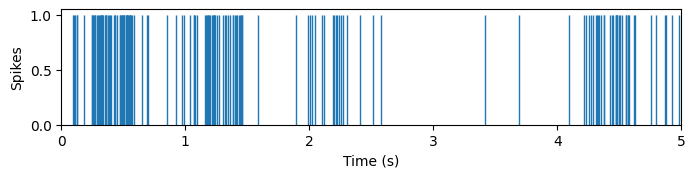

In [36]:
plt.figure(figsize=(8,1.5))
plt.vlines(spikes, 0, 1, lw=1, label='spikes')
plt.xlim(0,5)
plt.ylim(0,None)
plt.xlabel('Time (s)')
plt.ylabel('Spikes')
plt.show()

## Exercise 3

In [70]:
t_end = 5.0 # Will only consider t_i<t_end
bin_size = 0.1 # Bin size
bin_counts = np.zeros(int(t_end/bin_size)) # Binned counts
for t in spikes:
    if t>=t_end: continue
    print(t)
    bin_counts[int(t/bin_size)] += 1 #int(t/bin_size) 為該時間點的spike對應到bin＿counts的索引位置, 將該位置的值＋1
time = np.concatenate([(i,i+1) for i in range(len(bin_counts))])*bin_size #Conbine all the elements into an array
rates_1 = np.c_[bin_counts,bin_counts].flatten()/bin_size

0.09696167830561589
0.1030768745094716
0.11433396098382988
0.12579945863553768
0.128872388085722
0.1835971585668616
0.24427283939069214
0.24608383175787588
0.2518009328301293
0.260952409940776
0.2703946809004737
0.2741603786860226
0.2903553253666068
0.2948400364516646
0.30198304294548906
0.3094273951597796
0.3201245404875461
0.3214187353121
0.3258495129185957
0.32826611523552207
0.33154679971752166
0.33653384993528634
0.349519598796103
0.3588570279276519
0.36174743355075983
0.362027286803633
0.37417165156329996
0.3849430866293732
0.3926818110173853
0.3980025850638727
0.4274225527099839
0.4326698099063527
0.43342265835809257
0.45225739434123463
0.4752636498331731
0.4756050983557577
0.47943679482395496
0.48882653311273516
0.49034760354723084
0.49396309630772894
0.49595050719750283
0.5046154669999611
0.5055120790805218
0.5231559129918117
0.5246254099684757
0.5270026403175045
0.5273287011583788
0.5278347784082477
0.5344697639539557
0.5459713734796424
0.5505091115005722
0.5534123765439568
0

In [37]:
print(bin_counts)

[ 1.  5.  8. 16. 11. 15.  3.  0.  1.  3.  5.  6.  9.  7.  8.  1.  0.  0.
  1.  1.  3.  4.  5.  1.  1.  2.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.
  1.  0.  0.  0.  1.  0.  5.  7.  9.  7.  2.  2.  2.  2.]


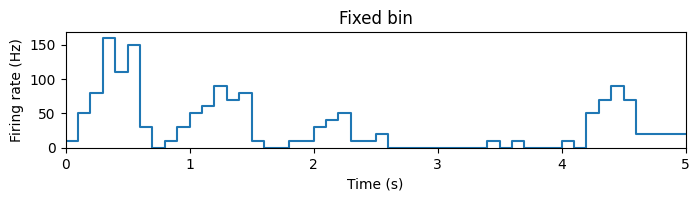

In [68]:
plt.figure(figsize=(8,1.5))
plt.plot(time, rates_1)
plt.xlim(0,5)
plt.ylim(0,None)
plt.xlabel('Time (s)')
plt.ylabel('Firing rate (Hz)')
plt.title('Fixed bin')
plt.show()

## Exercise 4

The window function

In [64]:
plt.figure(figsize=(3,2))
# Some arbitrary window function
def rec_func(times,w):
    t = times
    return ((t>-w)*(t<w)).astype(float)
win_times = np.arange(-0.2,0.2,delta_time)
win_kernel = rec_func(win_times,0.05)
win_kernel /= (delta_time*win_kernel.sum()) # Normalize 確保kernal面積＝1

<Figure size 300x200 with 0 Axes>

Convolve the frames with the window function

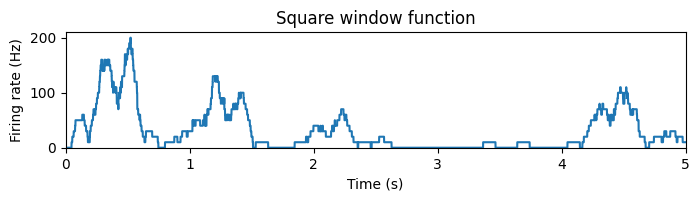

In [65]:
front_drop = (win_times>0).sum() # Number of points to be dropped from the front
rates_2 = np.convolve(
    frames,
    win_kernel[::-1]
)[front_drop:-len(win_kernel)+1+front_drop]

times = np.arange(0, 10, delta_time)

plt.figure(figsize=(8,1.5))
plt.plot(times, rates_2) # remove wkn//2 from beg
plt.xlim(0,5)
plt.ylim(0,None)
plt.xlabel('Time (s)')
plt.ylabel('Firing rate (Hz)')
plt.title('Square window function')
plt.show()

## Exercise 5 - Gaussian Window

In [63]:
def gau_win(x_points,sigma):
    '''Gaussian window function

    Parameters
    ----------
    x_points :  Positions
       sigma :  Standard deviation
    '''
    return np.exp(-(x_points/sigma)**2/2)/(np.sqrt(2*np.pi)*sigma)

In [42]:
rates_3 = np.array([gau_win(t-spikes,0.1).sum() for t in times])

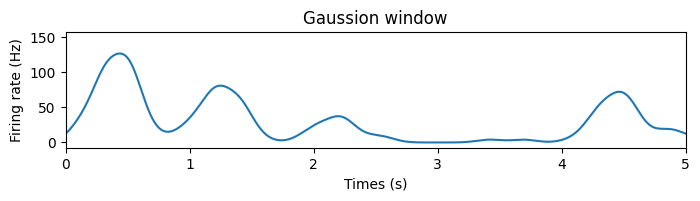

In [49]:
plt.figure(figsize=(8,1.5))
plt.plot(times, rates_3)
plt.xlim(0,5)
plt.xlabel('Times (s)')
plt.ylabel('Firing rate (Hz)')
plt.title('Gaussian window')
plt.show()

## Exercise 6 - Causal Window

In [61]:
def cau_win(x_points,win_width):
    '''Causal window function with a width

    Parameters
    ----------
     x_points :  Positions
    win_width :  Width of causal window(=1/alpha(Hz))
    '''
    return (x_points>0)*x_points*np.exp(-x_points/win_width)/win_width**2

rates_4 = np.array([cau_win(t-spikes,0.1).sum() for t in times])

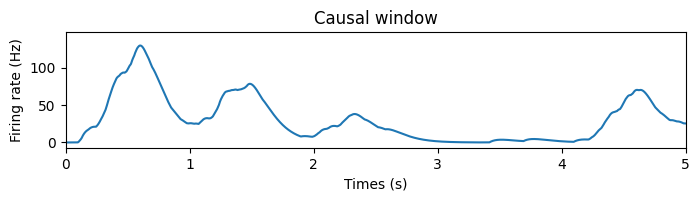

In [62]:
plt.figure(figsize=(8,1.5))
plt.plot(times, rates_4)
plt.xlim(0,5)
plt.xlabel('Times (s)')
plt.ylabel('Firing rate (Hz)')
plt.title('Causal window')
plt.show()

## Combining all the figures for exercise:

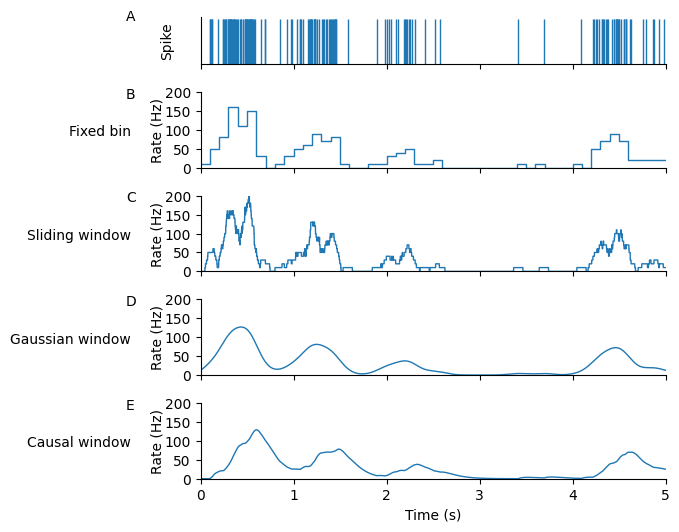

In [71]:
f,aa = plt.subplots( # We will make five plots together
    5,figsize=(6,6),sharex=True,
    gridspec_kw={'height_ratios':[1,1.6,1.6,1.6,1.6]}
)
plt.subplots_adjust(hspace=0.4) # Adjust the spacing a little
for a,i in zip(aa,['A','B','C','D','E']):
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)
    a.text(-0.16,0.92,i,transform=a.transAxes)

# Draw the spike train
a = aa[0]
a.vlines(spikes,0,1,lw=1)
a.set_yticks([])
a.set_ylim([0,None])
a.set_ylabel('Spike',labelpad=19)
a.set_xlim(0,5)

# Fixed binning
a = aa[1]
a.plot(time,rates_1,lw=1)

# Sliding window
a = aa[2]
a.plot(times,rates_2,lw=1)

# Gaussian window
a = aa[3]
a.plot(times,rates_3,lw=1)

# Causal window
a = aa[4]
a.plot(times,rates_4,lw=1)
a.set_xlabel('Time (s)')
# Show labels and adjust y-axes
for a,tt in zip(aa[1:],['Fixed bin','Sliding window','Gaussian window','Causal window']):
    a.set_ylabel('Rate (Hz)',labelpad=0)
    a.set_yticks([0,50,100,150,200])
    a.set_ylim([0,200])
    a.text(-0.15,0.42,tt,transform=a.transAxes,ha='right')
plt.show()